<a href="https://colab.research.google.com/github/garestrear/Curso_de_Python/blob/master/Sesion2/Sesion2_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/garestrear/Curso_de_Python/master/S2_Visualizacion.png)


# **Sesión 2. Graficación avanzada**
Hola ninja paythonista, en esta clase aprenderás a usar las funciones básicas de las librerías `matplotlib`. Esta es la librería más usadas para graficar en Python. 

La documentación de `matplotlib` la puedes explorar aquí:
https://matplotlib.org/contents.html


##**El poder de graficar con Python**

La base de datos **NY_taxi_fee.csv** contiene información acerca de los **costos de un recorrido de taxi en New York** entre enero de **2009** y junio de **2015**. 

Fuente de los datos:
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Ejecuta la siguiente línea de código para importar la base de datos **NY_taxi_fee.csv** desde nuestro repositorio en Github. 

In [ ]:
# La siguiente línea importa la librería pandas, una librería especializada en el manejo de bases de datos. 
import pandas as pd
# Leemos los datos desde nuestro remopositorio in Github
data = pd.read_csv('https://raw.githubusercontent.com/garestrear/Curso_de_Python/master/NY_taxi_fee.csv',
                   skiprows=1, nrows = 1500, usecols=[2,3,4,5,6,7,8], names = ['Precio', 'Fecha', 'inicio_longitud',
                                                                                   'inicio_latitud', 'fin_longitud', 'fin_latitud'
                                                                                   ,'num_pasajeros'])
# Limpiamos un poco los datos 
data = data.where((data.fin_latitud>=40.6915) & (data.inicio_latitud<=40.8513) & 
                  (data.inicio_latitud>=40.6915) & (data.fin_latitud<=40.8513) &
                  (data.inicio_longitud>=-74.0507)&(data.inicio_longitud<=-73.8653) &
                  (data.fin_longitud>=-74.0507 ) & (data.fin_longitud<=-73.8653)).dropna()
data.head()

La siguiente línea instala la librería `mplleaflet` en nuestro entorno en los 
servidores de Google Colab (Ejecutar solo una vez). 

ref: https://github.com/jwass/mplleaflet


In [ ]:
!pip install -q mplleaflet

Importa las librerías `mplleaflet` y el conjunto de funciones de visualización `pyplot`. 

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet

¡Grafica los puntos coordenados de las solicitudes de taxi sobre en el mapa de New York!



In [ ]:
in_lon = data['inicio_longitud'].tolist()
in_lat = data['inicio_latitud'].tolist() 
plt.figure(figsize=(8,8))
plt.scatter(in_lon, in_lat, c='g', alpha=0.7, s=4)
mplleaflet.display()

In [ ]:
# Diferenciando entre días de semana y fines de semana
from datetime import datetime 

data['Dia'] = pd.to_datetime(data['Fecha']).apply(lambda x:x.weekday())
data['Hora'] = pd.to_datetime(data['Fecha']).apply(lambda x:x.hour)

# Lunes = 0, Martes = 1,..., Domingo = 6
# Filtramos la base de datos por los días de fin de semana
data_weekend = data.where((data['Dia'] > 4) & (data['Dia'] < 7)).dropna()
# Filtramos la base de datos por los días de fin de semana en la noche de 10 pm a 4 am
data_weekend_noche = data_weekend.where((data_weekend['Hora'] > 22) | (data_weekend['Hora'] < 4)).dropna()
# Filtramos la base de datos por días de la semana
data_week = data.where(data['Dia']<5).dropna()

# Extraemos las coordenadas geográficas de cada de los lugares donde se solicitó un servicio de taxi
lon_weekend = data_weekend['inicio_longitud'].tolist()
lat_weekend = data_weekend['inicio_latitud'].tolist() 
lon_weekend_noche = data_weekend_noche['inicio_longitud'].tolist()
lat_weekend_noche = data_weekend_noche['inicio_latitud'].tolist() 
lon_week = data_week['inicio_longitud'].tolist()
lat_week = data_week['inicio_latitud'].tolist() 

# Graficamos
plt.figure(figsize=(8,8))
# plt.scatter(lon_weekend, lat_weekend, c='g', alpha=0.7, s=4)
plt.scatter(lon_weekend_noche, lat_weekend_noche, c='b', alpha=0.7, s=20) #Grafica de azúl los puntos donde se solicitó un taxi un fin de semana entre 10 pm y 4 am
plt.scatter(lon_week, lat_week, c='r', alpha=0.7, s=4) # Pedidos en días de semana graficados de rojo.
mplleaflet.display()


#**Manos a la obra Ninja Pythonista!!**
Iniciemos nuestro camino de expertos en graficación.

Primero importemos el conjunto de funciones `pyplot` desde `matplotlib`

**Tu turno:** Corre la siguiente celda de código

In [ ]:
import matplotlib.pyplot as plt # Da clic en le botón de play o Shift+Enter

#**1. Graficar Puntos en el Plano:**

Para graficar puntos usamos la función `scatter`.
El código `plt.scatter(x,y)` grafica un punto de coordenadas $(x,y)$.

Agregamos:  
`c = 'purple'` para cambiar el color, 

`marker = '*' `para cambiar la forma del punto,

`s = 90` para cambiar tamaño, y 

`alpha = 0.7` para cambiar la intensidad del color. 


Podemos explorar como esta usar esa función usando el siguiente código:

In [ ]:
plt.scatter?

In [ ]:
plt.scatter(3,2, c = 'purple', marker='*', s =90, alpha = 0.7)
plt.show()

### **Lista de posibles colores**: 

**azúl** = 'b' o 'blue',    **cian** = 'c',  **rojo** = 'r' o 'red',      **morado** = 'm' o 'purple',
**verde** = 'g' o 'green',  **amarillo** = 'y' o 'yellow', 
**negro** = 'k' o 'black':,  **blanco** = 'w' o 'white'

Podemos definir cualquier color en **formato RGB** usando una lista de **tres números entre 0 y 1**. Por ejemplo:

`plt.scatter(2,3, c = [0.5,0.73,0.82])`

###**Posibles marcadores (forma del punto):**
 **círculo** = 'o', **cuadrado** = 's', **pentágono**= 'p', 
              **triángulo abajo** = 'v':, **triángulo arriba** ='^', 
              **estrella** = '\*', 
              **hexágono** = 'h', **hexágono grande** = 'H' , **cruz** ='+'
                                               
Puedes encontrar otros marcadores aquí:
https://het.as.utexas.edu/HET/Software/Matplotlib/api/pyplot_api.html#matplotlib.pyplot.plot

**Tu turno:** En la siguiente celda de código grafica el punto (-3,8) de color verde y con forma de triángulo.

In [ ]:
# Grafica un el punto (-3,8) de color verde y con forma de triángulo


**Tu turno:** En la siguiente celda de código reemplaza los valores de A, B y C por números entre 0 y 1 para definir un color en formato RGB.

In [ ]:
# Reemplaza los valores de A, B y C por números entre 0 y 1 para definir un color en formato RGB
plt.scatter(2,3, c = [A,B,C])
plt.show()

##**Graficando más de un punto**.

Por ejemplo, para graficar los puntos $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$

usamos: `plt.scatter([x_1,x_2,x_3],[y_1,y_2,y_3])`

In [ ]:
# Graficamos los puntos (1,1), (2,4), (3,9), (4,16)
plt.scatter([1, 2, 3, 4], [1, 4, 9, 16], s =90, c =  'red', marker = 's',alpha =0.7)  
plt.show()

In [ ]:
# Podemos definir un color para cada punto
import numpy as np
plt.scatter([1, 2, 3, 4], [1, 4, 9, 16], s =90, c =  ['c','blue', np.random.rand(3), [0.3,0.8,0.2]], marker = 's',alpha =0.7)  
plt.show()

**Tu turno:** En la siguiente celda de código grafica los vértices de un cuadrado de coordenadas (1,0), (0,1), (-1,0), (0,-1) con colores diferentes; usa el parámetro alpha.


In [ ]:
# Grafica los vértices de un cuadrado de coordenadas (1,0),(0,1),(-1,0),(0,-1) con colores diferentes; use el parámetro alpha.


#**2. Graficar Segmentos de Recta.**

Para graficar segmentos de recta usamos la función` plt.plot()`. 
Veamos la documentación de esta función:


In [ ]:
plt.plot?


Podemos crear un segmento de recta entre los puntos $(x_1,y_1)$ y $(x_2,y_2)$ usando el código: `plt.plot([x1,x2],[y1,y2])`

In [ ]:
# Segmento de recta entre el punto (-4,2) y el punto (1,-3)
plt.plot([-4,1],[2,-3], color='g',marker='^', markersize=10, linestyle= '-.', linewidth=2)
# Forma compacta 
#plt.plot([-4,1],[2,-3], 'g^-.')
plt.show()

**Tu turno:** En la siguiente celda de código grafica un segmento del punto (0,1) al punto (-1,0) de color morado y cuadrados en los extremos.


In [ ]:
# Grafica un segmento del punto (0,1) al punto (-1,0) de color morado y cuadrados en los extremos


##**Graficando Segmentos de recta consecuitvos**



In [ ]:
# Graficando una línea que pase por los puntos:
# (1,1), (2,4), (3,9), (4,16)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], c = 'r', marker = 'o', linestyle = '--', linewidth=4, markersize=6, markerfacecolor ='b', alpha =0.6)
plt.show()

**Tu turno:** En la siguiente celda de código grafica un el cuadrado con vértices en los puntos (1,0), (0,1), (-1,0), (0,-1) de color morado y cuadrados en los extremos.

In [ ]:
# Grafica un el cuadrado con vértices en los puntos (1,0),(0,1),(-1,0),(0,-1) de color morado y cuadrados en los extremos


#**3. Rellenando espacio entre líneas**

Para rellenar el espacio entre un conjunto de líneas usamos la función `plt.fill()`. 

Para rellenar el espacio definido por las listas $[x_1,x_2,x_3,x_4,x_5]$ y $[y_1,y_2,y_3,y_4,y_5]$ usamos:

`plt.fill( [x1,x2,x3,x4,x5], [y1,y2,y3,y4,y5])`

**Tu turno:** Genera un cuadrado y rellenalo de color verde y con poca intencidad.

In [ ]:
# El siguiente line de código genera un cuadrado
plt.plot([1,0,-1,0,1],[0,1,0,-1,0], 'ms--')
##***************************Escribe el código para rellenar el cuadrado***************************##
  
##***************************************************************************************************##
plt.show()

#**4. Varias Líneas en una Gráfica**

Para gráficar varias líneas en una misma gráfica usamos la función `plt.plot()`tantas veces como líneas queramos graficar.

##**Tamaño, Nombre de los ejes, título y guardar la gráfica**

1. Usamos ` plt.figure(figsize=(10,3)` para una figura de tamaño `(10,3)`.

2. Usamos `plt.xlabel() ` y  `plt.ylabel()` para poner nombre a los ejes $x$ y $y$, respectivamente.  
3. Para  poner **título** iniciamos el código creando un objeto de la clase` plt.figure()`. Luego, podemos añadir un título usando `fig.suptitle()`.
4.  Para **guardar** una figura usamos `plt.savefig()`. 


In [ ]:
# Creamos un objeto de la figura
fig  = plt.figure(figsize =(10,3)) # el parametro figsize cambia el tamaño de la figura 

# Las siguiente dos líneas de código  generan las líneas en la gráfica 
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'm*--', label = 'Gráfica 1') # La etiqueta se usa cuando se crea una legenda
plt.plot([-1,1,3], [2,6,1.5], 'go-', label = 'Gráfica 2')

##**************************************************************************##
##***********************Información adicional******************************##
##**************************************************************************##
# Etiquetas de los ejes 
plt.ylabel('Nombre eje y') 
plt.xlabel('Nombre eje x')
# Título de la figura
fig.suptitle('Título de la Figura', fontsize =20, color='c')
# Crear una leyenda de la gráfica
plt.legend() # Usar plt.legend(loc= (num, num)) para cambiar la posición de la legenda
# Para guardar la gráfica ejecute
plt.savefig('Mi primera gráfica en python.png') # También se puede fig.savefig() cuanod una objeto figura ha sido creado.
##**************************************************************************##
##**************************************************************************##

plt.show()


**Tu turno:** En la siguiente celda de código modifica el código anterior para


1.   Cambiar el color de la línea verde,
2.   Cambiar los marcadores de la línea morada y
3.   Cambiar el tamaño de la figura.


In [ ]:
# Copia y pega aquí el código anterior:


#**5. Arreglo de Gráficas (Subgráficas)** 

En algunas ocasiones será necesario comparar varias gráficas en diferentes plano cartesianos. En estos casos, generar un arreglo de gráficas como el siguiente será de mucha utilidad. 

Por ejemplo:

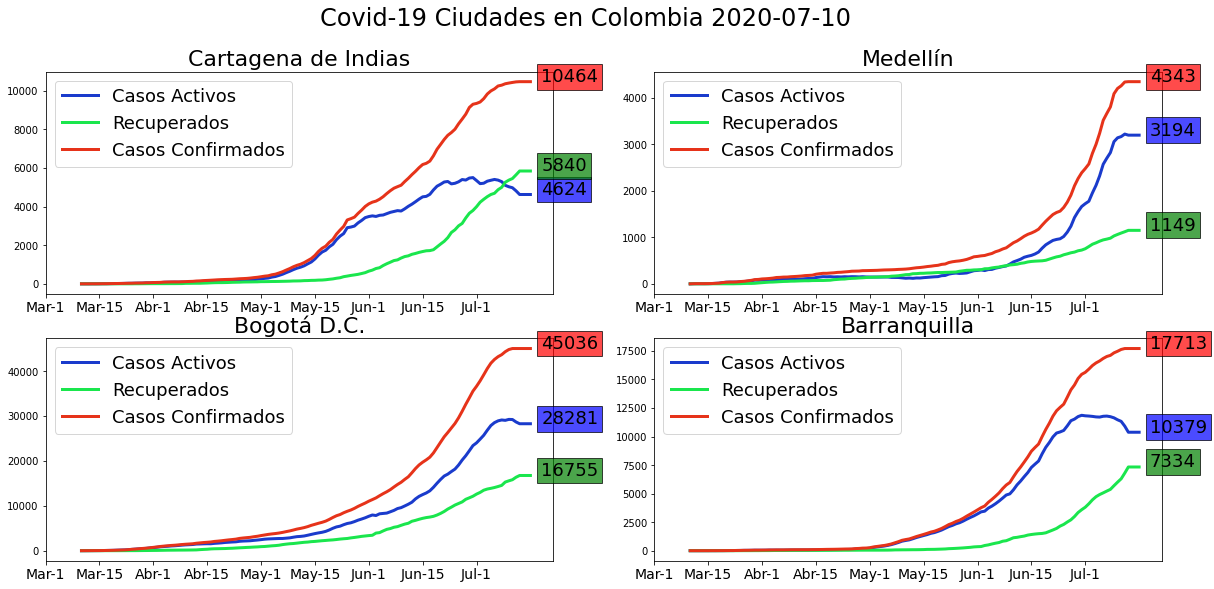

Para crear un arreglo usamos la función` plt.subplots()`. Para ver una 
pequeña documentación de esta función ejecute la siguiente linea.

In [ ]:
plt.subplots?

Esta función devuelve una figura `fig` y un arreglo de subgraficas `axs`. Por ejemplo

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharey=True, sharex=True)
# Primera gráfica
axs[0].plot([1, 2, 3, 4], [1, 4, 9, 16], 'm*--')
# Segunda gráfica
axs[1].plot([-1,1,3], [2,6,1.5], 'go-')

##**************************************************************************##
##***********************Información adicional******************************##
##**************************************************************************##
# Etiquetas de los ejes 
axs[0].set_ylabel('Nombre eje y de la primera gráfica' )
axs[0].set_xlabel('Nombre eje x  de la primera gráfica')
axs[0].set_title('Título de la primera gráfica', c= np.random.rand(3), fontsize = 16)#fontsize cambia el tamaño de la letra

# Nombre de los ejes y título 
axs[1].set_ylabel('Nombre eje y de la segunda gráfica')
axs[1].set_xlabel('Nombre eje x  de la segunda gráfica')
axs[1].set_title('Título de la segunda gráfica', c= np.random.rand(3), fontsize = 16)#fontsize cambia el tamaño de la letra

# Título de toda la figura
fig.suptitle('Acá el título de la figura', fontsize = 20, color = 'navy') 
##**************************************************************************##
##**************************************************************************##

plt.show()

**Tu turno:** Ejecuta el siguiente bloque de código y luego modificalo para:


1.   Ubicar las gráficas horizontalmente.  
2.   Cambiar el ancho de la figura para mejorar el aspecto.
3.   Cambiar color de la gráfica de solo estrellas.
4.   Establecer la frase "Diferencia entre scatter y plot" como título de la figura.

In [ ]:
import numpy as np
x = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
y = x**2

fig , axs = plt.subplots(2,1,figsize=(5,5))
axs[0].scatter(x, y, c = 'b', marker='*', alpha = 0.9, s=60 )
axs[1].plot(x, y, 'b*--', markersize =8, )
plt.show()

#**6. Graficando funciones**

Para graficar una función `mi_fun` usamos el comando `plt.plot(x,y)`, donde:`

1.  `x = [x_1,x_2,...,x_d]`  es un arreglo o lista que contiene primera coordenada de puntos a gráficar
2.   `y = [mi_fun(x_1), mi_fun(x_2),..., mi_fun(x_d)]` es el arreglo o lista de la imagenes de `mi_fun`.

Para generar el arrelo `x` usamos la función de numpy `np.linspace()`.

El comando `np.linspace(a,b,k)` genera $k$ números igualemente distanciados desde $a$ hasta $b$ (incluyéndolos).


In [ ]:
x = np.linspace(-3,3,61)
print(x)

Grafiquemos la función $x^{4} - 7x^2 + x +2$. 

In [ ]:
#Definimos la función a graficar
def mi_fun(x):
  return x**4 - 7*x**2 + x + 2

Para definit `y`  usamos `list(map(mi_fun, x))`

In [ ]:
y = list(map(mi_fun, x))
print(y)

In [ ]:
#Graficamos la función mi_fun desde -3 hasta 3
plt.plot(x,y)
plt.show()

**Tu turno:** En la siguiente celda de código grafica la función $tan(x)$ (`np.tan(x)`) entre $-1$ y $1$.

In [ ]:
import numpy as np
##***************************************************** Escribe tu código aquí***************************************************** ##


##**Cambiar la enumeración en los ejes**

Para cambiar la posición de las etiquetas en los ejes usamos 

`axs.set_xticks(eje x)`  y 

`axs.set_xticks(eje y).` 

Por ejemplo:

In [ ]:
fig, ax= plt.subplots(1,1)
x = np.linspace(-1,1,11)
y = x**2
ax.plot(x,y)
# ax.set_xticks([-1,0,1])
# ax.set_xticklabels(['Yo', 'soy', 'Ninja']) # Para cambiar la etiqueda en cada posición
plt.show()

**Tu turno:** En la siguiente celda de código grafica de nuevo la función $tan(x)$ entre $-1$ y $1$. Luego cambia las posiciones y nombres de los ejes.

In [ ]:
# Grafica la función tan(x) entre -1 y 1.
# Cambie las posiciones y nombres de los ejes.


#**7. Histogramas**
"En estadística, un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados". 
Ver: https://es.wikipedia.org/wiki/Histograma#:~:text=En%20estad%C3%ADstica%2C%20un%20histograma%20es,frecuencia%20de%20los%20valores%20representados.

Para crear un histograma de una lista de datos $x$ usamos `plt.hist(x)`

La documentación de esta función puede verse aquí: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

Definamos $x$ como una lista aleatoria de números tomados desde una variable aleatoría normal estándar.

In [ ]:
x = np.random.randn(200)
print(x)

In [ ]:
plt.hist(x)
plt.show()

Para fijar el número de barras, por ejemplo a 40, agregamos el argumento 
`bins= 40.`

In [ ]:
plt.hist(x, bins=40) #Color y opacidad también pueden ser modificados de manera usual.
# Cambiar el tipo de histograma (opcional):  histtype : {'bar', 'barstacked', 'step', 'stepfilled'}
# Cambiar la orientación (opcional): orientation : {'horizontal', 'vertical'}
plt.show()

**Tu turno:** En la siguiente celda de texto grafica el histograma de la  lista `x = np.random.gamma(2, 2, 600)` con 70 barras, un color diferente a azúl y con poca opacidad.

In [ ]:
# Grafique el histograma de la siguiente lista x con: 70 barras, un color diferente a azúl y con poca opacidad. 
x = np.random.gamma(2, 2, 600)
# Escriba su código aquí

#**8. Puntos y Segmentos 3D**

Pata generar gráficas en 3 dimensiones usamos la función `Axes3D` de `mpl_toolkits.mplot3d`

**Tu turno:** Ejecuta la siguiente linea.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Para graficar un conjunto de puntos en 3 dimensiones que tienen sus coordenadas en las listas $x,y,z$, respectivamente, usamos `plt.scatter(x,y,z)`. 

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Los puntos a graficar son (1,5,2), (2,6,3), (3,2,3), (4,3,3) y (5,13,5)
x = np.array([1,2,3,4,5])
y = np.array([5,6,2,3,13])
z = np.array([2,3,3,3,5])

ax.scatter(x, y, z, c='r', marker='^', alpha = 0.5)

# Similar al caso 2D podemos poner etiquetas a los ejes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

**Tu turno:** En la siguiente celda de código grafica en en tres dimensiones los puntos de las listas $x_1, y_1$ y $z_1$ que allí se dan.

In [ ]:
# Gráfique en 3 dimensiones los puntos dados por las listas x1, y1, z1.
x1 = [2]*len(x) +x
y1 = y
z1 = y + z 


Para graficar líneas en 3 dimensiones usamos `plt.plot()`


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array([1,2,3,4,5])
y = np.array([5,6,2,3,13])
z =np.array([2,3,3,3,5])

ax.plot(x, y, z, c='r', marker='o', alpha = 0.8)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#**8.Graficar funciones en 3D**

En el siguiente ejemplo graficaremos la función $f(x,y) = sen(x^2 + y^2)$ en el cuadrado $[-6,6] \times [-6,6]$.

In [ ]:
import numpy as np 
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 60, cmap ='winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()



**Tu turno:** En la siguiente celda de código copia el código anterior y modificalo para graficar la función $f_1(x, y) = \cos( \sqrt{x^2 + y^2})$ en el cuadrado $[-4,4] \times [-10,8]$.

In [ ]:
##***************************************************** Escribe tu código aquí***************************************************** ##


#**9. Arreglos de gráficas en 3 dimensiones**

En el siguiente código usaremos la función $f_1(x, y) = \cos( \sqrt{x^2 + y^2})$

In [ ]:
def f1(x, y):
    return np.cos(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f1(X, Y)

fig, axs = plt.subplots(1,3, figsize = (21,7)) #creamos un arreglo de gráficas 

ax1 = fig.add_subplot(1, 3, 1, projection='3d',) # esta linea añade una subgráfica en 3D
ax1.plot_wireframe(X, Y, Z, cmap = 'magma')

ax2 = fig.add_subplot(1, 3, 2, projection='3d')# esta linea añade una subgráfica en 3D
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')

ax3 = fig.add_subplot(1, 3, 3, projection='3d')# esta linea añade una subgráfica en 3D
num_bars = 15
# Posición de las barras
x_pos = 10*np.random.rand(num_bars)
y_pos = 10*np.random.rand( num_bars)
z_pos = [0] * num_bars

# Dimensiones de las barras
dx = 1
dy = 1
dz = 100*np.random.rand( num_bars)
ax3.bar3d(x_pos, y_pos,z_pos, dx, dy, dz, color='aqua')
plt.show()

#**10. Material Adicional**
Te recomendamos que explores los siguientes herramientas que puedes usar para gráficar en Python. De seguro te serán muy útiles.




##**Mapas de Calor**

Un mapa de calor es una técnica de visualización de datos que muestra la magnitud de un fenómeno como color en dos dimensiones

Documentación: https://seaborn.pydata.org/generated/seaborn.heatmap.html

Posibles mapas de calor: https://matplotlib.org/tutorials/colors/colormaps.html

In [ ]:
import seaborn as sns
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8,8))
axs = plt.axes()
sns.heatmap(Z,cmap= 'summer', ax =axs)
axs.set_title('Mapa de Calor')
plt.show()

#**11. Gráfica de Barras** 

Para hacaer una gráfica de barras usamos `plt.bar()`. Las entradas de la función son las mismas que en `plt.plot()` y `plt.scatter()`.


#**12. Texto en un gráfica**

Para incluir texto en una gráfica `ax` podemos usar la función `ax.text()` o `ax.annotate()`. 

Documentación de `ax.text()` :https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html

Documentación de `ax.annotate()`: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html
 

In [ ]:
# Creamos un arreglo de una sola gráfica 
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
# Gráfico de barras
axs.bar([-1,0,1,2], [2,1,-1,1.5], alpha=0.4, color=np.random.rand(3))
# Podemos decidir dónde el eje y tiene etiquetas
axs.set_yticks([-1,1, 1.5,2 ])    #Usamos  set_yticks
# axs.set_yticklabels(['et_1','et_2', 'et_3', 'et_4']) #Podemos poner cualquier etiqueta que queramos
# Para colocar texto en la figura 
axs.annotate('¡Una barra negativa!', (1, 0), xytext=(0.8, 0.9), textcoords='axes fraction',  arrowprops=dict(facecolor='black', shrink=0.15),
            fontsize=16, horizontalalignment='right', verticalalignment='top')
axs.set_title('Gráfica de Barras', fontsize =20)

plt.show()

#**13. Graficando funciones de Numpy**

Para graficar una función $f$ usamos el comando `plt.plot(x,y)`, donde: 

1.  $x = [x_1,x_2,...,x_d]$  es un arreglo o lista que contiene primera coordenada de puntos a gráficar
2.  $ y =[f(x_1), f(x_2),...,f(x_d)]$ es el arreglo o lista de la imagenes de $f$. 


Para generar el arreglo $x$ usamos la función de numpy `np.linspace()`.

El comando `np.linspace(a,b,k)` genera $k$ números igualemente distanciados desde $a$ hasta $b$ (incluyéndolos).



In [ ]:
# Por ejemplo:
np.linspace(-1,1,11)

Si la función $f$ es una función de `numpy`, digamos f = `np.fun`, entonces


$y=$  `np.fun(x)`. 
Por ejemplo
1.   Si $f(x) = e^{x}$, entonces usamos $y=$ `np.exp(x)`. 
2.   Si $f(x) = sen(x)$, entonces usamos $y=$ `np.sin(x)`. 
3. Si $f(x) = x^{4} - 7x^2 + x +2$, entonces usamos $y=$ `x**4 - 7*x**2 + x + 2`.

In [ ]:
# Por ejemplo:
x = np.linspace(-3,3,20) 
y1 = 6*np.sin(x)  
y2 = 3 + np.sin(np.pi * x)
y3 = np.exp(x)
y4 = x**4 - 7*x**2 + x + 2

Ahora creamos un arreglo con las funciones anteriores graficadas entre $-3$ y $3$.

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15, 8), sharey=True, sharex=False)
axs[0,0].plot(x,y1)
axs[0,1].plot(x,y2, color='g')
axs[1,0].plot(x,y3, color='m')
axs[1,1].plot(x,y4, color='r')
axs[1,1].grid()
plt.show()

#**14. Vizualizando la base de datos Iris**

In [ ]:
import pandas as pd
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris=pd.read_csv(url,names = ['sepalo_largo','sepalo_ancho', 'petalo_largo','petalo_ancho','clase'])
iris.head()


In [ ]:
sep_ancho = iris['sepalo_ancho'].iloc[:].values
sep_largo = iris['sepalo_largo'].iloc[:].values
pet_ancho = iris['petalo_ancho'].iloc[:].values
pet_largo = iris['petalo_largo'].iloc[:].values

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]
axs[0].hist(sep_ancho, alpha=0.4, label = 'sep_ancho', bins =10, color = 'r')
axs[0].set_title('sep_ancho')
axs[1].hist(sep_largo, alpha=0.4, label = 'sep_largo', bins =10, color = 'g')
axs[1].set_title('sep_largo')
axs[2].hist(pet_ancho, alpha=0.4, label = 'pet_ancho', bins =10, color = 'c')
axs[2].set_title('pet_ancho')
axs[3].hist(pet_ancho, alpha=0.4, label = 'pet_largo', bins =10, color = 'm')
axs[3].set_title('pet_largo')
plt.show()

#**Explorando la librería Seaborn**

In [ ]:
iris.head()

In [ ]:
import seaborn as sns
sns.pairplot(iris, hue='clase', palette = ['r','g','m'])
plt.show()

##**Más parametros en Pairplot**

In [ ]:
#Para cambiar el tipo de gráfica en la Diagonal
#diag_kind : {'auto', 'hist', 'kde', None}
sns.pairplot(iris, hue='clase', palette = ['r','g','m'], vars = ['sepalo_ancho', 'petalo_largo'], diag_kind = 'hist')
plt.show()


#Tarea: 

Módifique el código 1 hasta obtener la siguiente imágen :

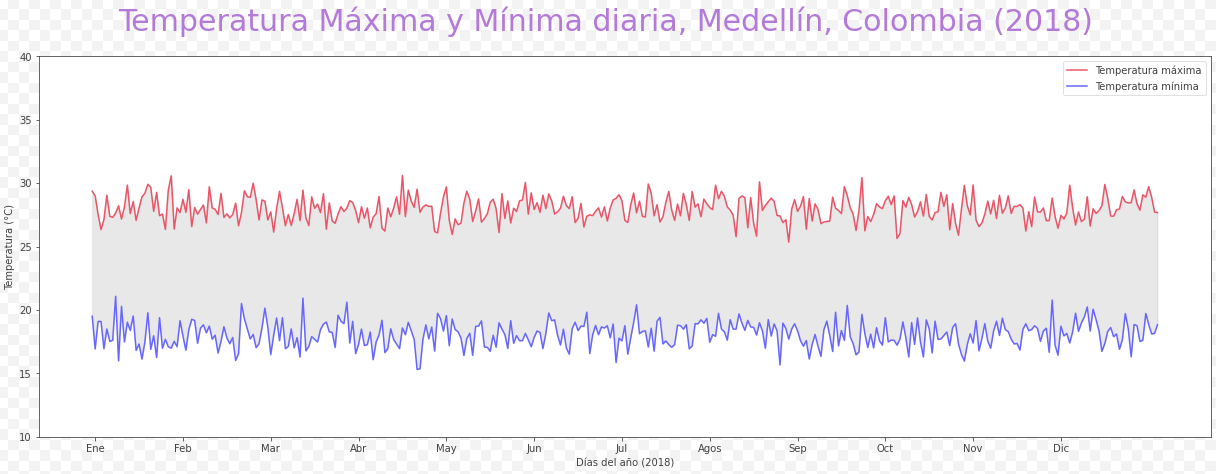






In [ ]:
# Primero ejecuta esta línea
import numpy as np 
y_max =  [28 + np.random.normal()  for x in range(365)] 
y_min =  [18 + np.random.normal() for x in range(365)] 
x = range(365)



###Código 1 es el siguiente:

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,7))
ax.set_ylim(10,40)
ax.plot(x,y_max, color = 'g')
ax.plot(x,y_min, color='g')
ax.fill_between(x, y_min, y_max)
plt.show()

##Paso 1:

Primero modifique el tamaño de la figura inicial a $(21,7)$ para obtener la siguiente imagen.

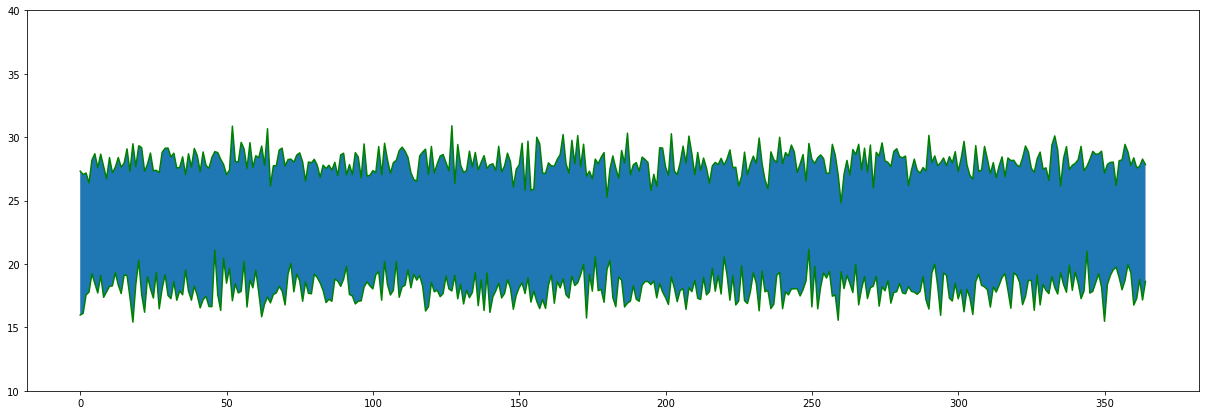

In [ ]:
# Genere la figura del paso 1 en este espacio

##Paso 2:

Ahora modifique el código del paso 1 para obtener una imagen parecida la siguiente 
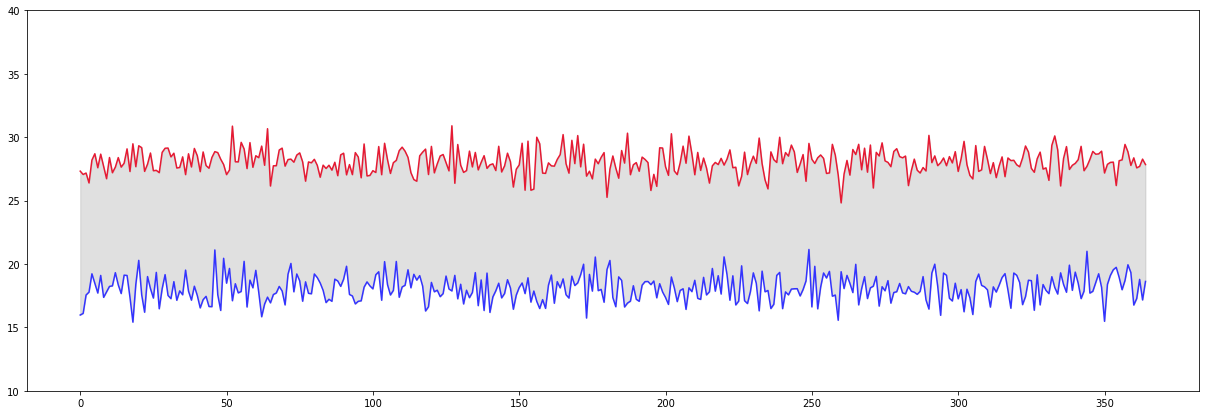

In [ ]:
# Genere la figura del paso 2 en este espacio 

##Paso 3:

Coloque título a la figura, nombres a los ejes para obtener e incluya una leyenda para obtener una imagen parecida a la siguiente.

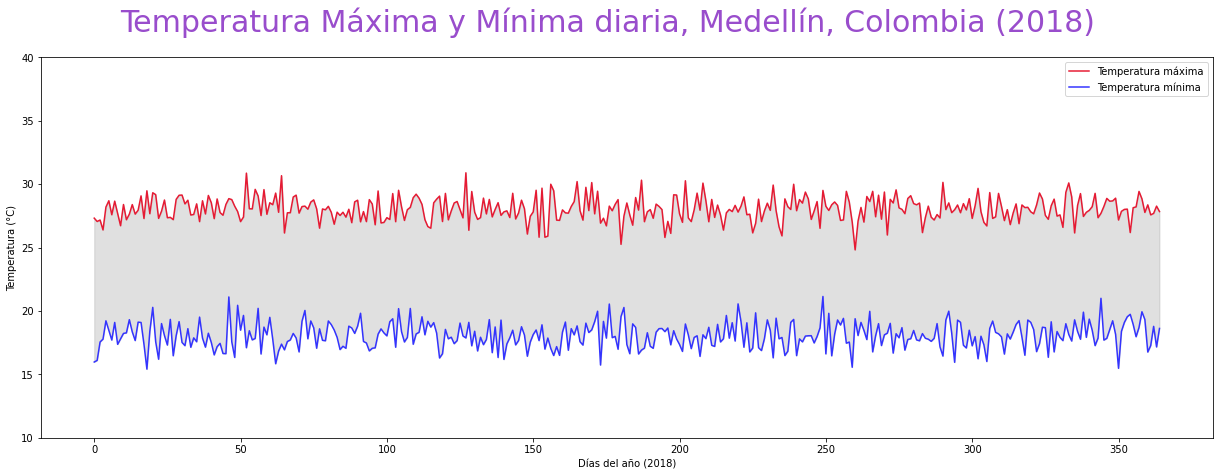

In [ ]:
# Genere la imagen del paso 4 en este espacio


##Paso 4:

Modifique el código del paso 3 para obtener la siguiente imagen

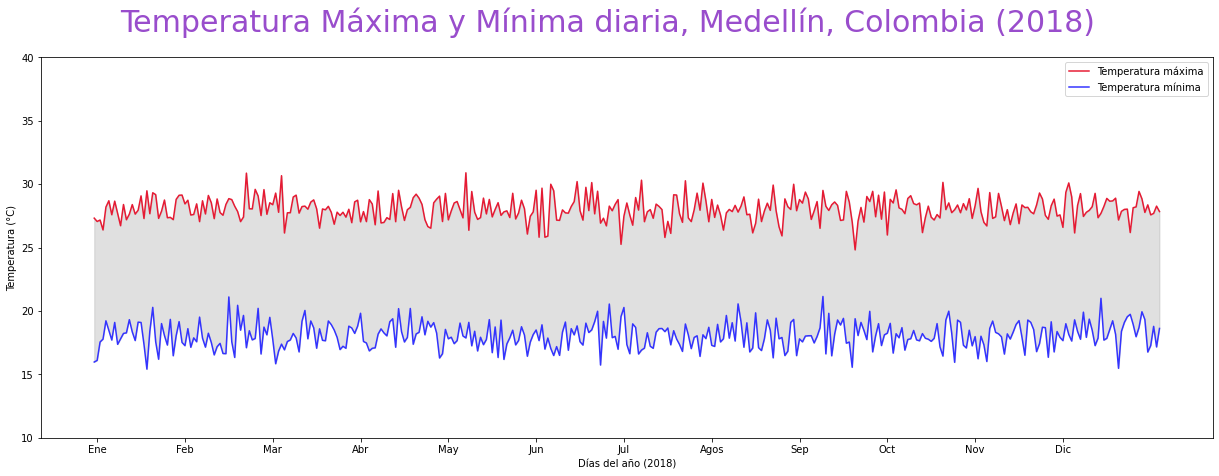

In [ ]:
# Genere la imagen del paso 4 en este espacio